# Critical CSTR for the 3D BTX system

## Python imports
We shall use the `Sympy` package to perform the symbolic computations.

In [1]:
import sympy
sympy.init_printing(use_unicode=False, wrap_line=False)

## Define Sympy symbols, kinetics and DSR mixing point

In [2]:
cB,cE,cT,cX,cD,cH = sympy.symbols('cB, cE, cT, cX, cD, cH')
k1,k2,k3 = sympy.symbols('k1, k2, k3')

##BTX example
k1=1;
k2=1;
k3=10;
rB = -k1*cB*sympy.sqrt(cE) - 2*k3*cB**2
rE = -0.5*k1*cB*sympy.sqrt(cE) - 0.5*k2*cT*sympy.sqrt(cE)
rT = k1*cB*sympy.sqrt(cE) - k2*cT*sympy.sqrt(cE)
rX = k2*cT*sympy.sqrt(cE)
rD = k3*cB**2
rH = k3*cB**2

r = sympy.Matrix([rB, rE, rT, rX, rD, rH])
A_bar = sympy.Matrix([[-1, -0.5, 1, 0, 0, 0], [0, -0.5, -1, 1, 0, 0], [-2, 0, 0, 0, 1, 1]]).T

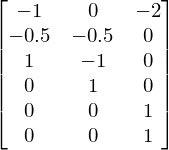

In [3]:
A_bar

In [4]:
J = r.jacobian(sympy.Matrix([cB,cE,cT,cX, cD, cH]))

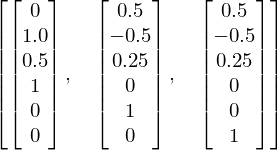

In [5]:
N = (A_bar.T).nullspace()
N

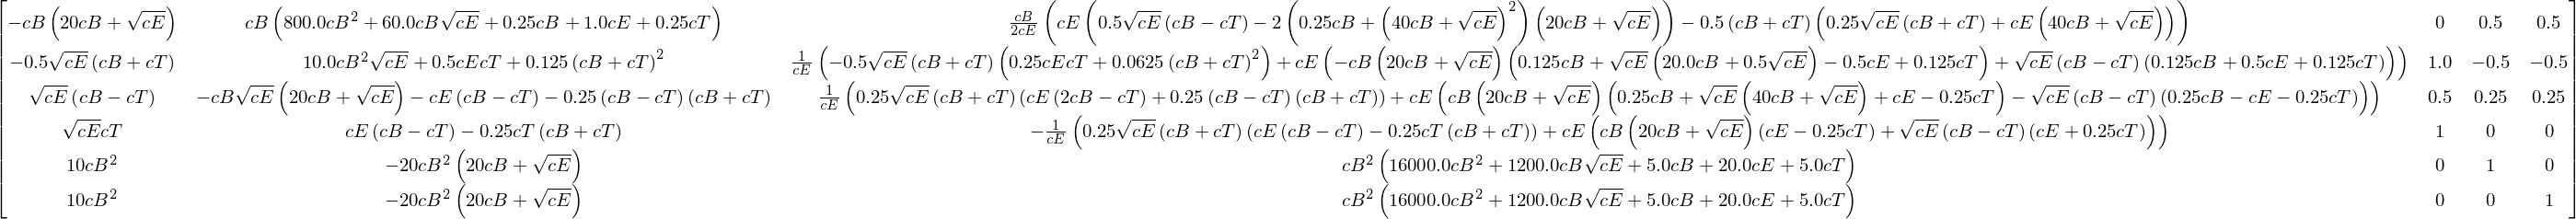

In [6]:
D = sympy.Matrix([r, J*r, J*J*r,N[0],N[1],N[2]])
D = sympy.simplify(sympy.Matrix(6,6,D).T)
D

In [7]:
#det of a 6x6 matrix takes way too long! compute numerically rather.
#det_fn = sympy.simplify(D.det())
#det_fn

In [8]:
expr_str = sympy.python(phi)
expr_str = expr_str.replace("**","^")
expr_str = expr_str.replace("Float('","")
expr_str = expr_str.replace("', prec=15)","")
expr_str = expr_str.replace("Rational","")
expr_str = expr_str.replace(", ","/")
expr_str = expr_str.replace("c_B", "C(1)")
expr_str = expr_str.replace("c_E", "C(2)")
expr_str = expr_str.replace("c_T", "C(3)")

print expr_str

NameError: name 'phi' is not defined